In [1]:
##Instalar solo una vez
install.packages("modeest")
install.packages("psych")
install.packages("moments")
install.packages("corrplot")
install.packages("e1071")
install.packages("fdth") 
install.packages("nortest")
install.packages("PairedData")


also installing the dependencies ‘timeSeries’, ‘gss’, ‘rmutil’, ‘clue’, ‘fBasics’, ‘stable’, ‘stabledist’, ‘statip’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘tmvnsim’, ‘mnormt’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘lmom’, ‘gld’, ‘mvtnorm’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [5]:
library(readr)
library(dplyr)
library(modeest)
library(e1071)
library(ggplot2)
library(corrplot)
library(psych)
library(fdth) # carga la extensión fdth (para el calculo de distribución de frecuencias.
library(nortest)
library(PairedData)
#library(moments)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘e1071’

The following object is masked from ‘package:modeest’:

    skewness

corrplot 0.84 loaded

Attaching package: ‘psych’

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Attaching package: ‘fdth’

The following object is masked from ‘package:modeest’:

    mfv

The following objects are masked from ‘package:stats’:

    sd, var

Loading required package: MASS

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select

Loading required package: gld
Loading required package: mvtnorm
Loading required package: lattice

Attaching package: ‘PairedData’

The following object is masked from ‘package:base’:

    summary



In [11]:
dataset <- read_delim("./dataset.csv",";", escape_double = FALSE, trim_ws = TRUE)
colnames(dataset)

Parsed with column specification:
cols(
  Comunidad = col_character(),
  Ciudad = col_character(),
  `Cantidad de perfiles facebook` = col_double(),
  `Tasa desempleo ciudad` = col_double(),
  `% Población sedentaria` = col_double(),
  `Salario medio por hora` = col_double(),
  `Parques m2/hab` = col_double(),
  `Usuarios jóvenes (18-39)` = col_double(),
  `Usuarios adultos (40-64)` = col_double(),
  `Usuarios mayores (+ 65)` = col_double(),
  Hombres = col_double(),
  Mujeres = col_double(),
  Población = col_double()
)


[1] "Comunidad"                     "Ciudad"                       
 [3] "Cantidad de perfiles facebook" "Tasa desempleo ciudad"        
 [5] "% Población sedentaria"        "Salario medio por hora"       
 [7] "Parques m2/hab"                "Usuarios jóvenes (18-39)"     
 [9] "Usuarios adultos (40-64)"      "Usuarios mayores (+ 65)"      
[11] "Hombres"                       "Mujeres"                      
[13] "Población"

In [20]:
#dataset[,c('Comunidad', 'Ciudad')]

In [23]:
dataset

Comunidad,Ciudad,Cantidad de perfiles facebook,Tasa desempleo ciudad,% Población sedentaria,Salario medio por hora,Parques m2/hab,Usuarios jóvenes (18-39),Usuarios adultos (40-64),Usuarios mayores (+ 65),Hombres,Mujeres,Población
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Castilla-La Mancha,Albacete,63.57,20.72,43.18,14.09,7.16,29.47,28.89,3.81,30.05,32.36,173050
Comunidad de Madrid,Alcalá de Henares,49.03,10.20,34.48,17.13,11.20,21.16,23.74,3.46,22.71,25.29,193751
Comunidad de Madrid,Alcorcón,55.46,10.15,34.48,17.13,7.80,21.83,27.73,5.90,24.78,30.09,169502
Comunidad Valenciana,Alicante,87.46,15.01,37.31,14.38,6.12,39.21,42.22,7.54,39.21,48.25,331577
Andalucía,Almería,101.60,19.71,39.20,14.48,6.50,50.29,45.72,6.10,47.75,55.88,196851
Extremadura,Badajoz,73.08,24.65,29.47,13.21,6.75,32.55,31.89,5.31,32.55,37.87,150530
Cataluña,Badalona,51.44,10.50,37.35,16.52,6.55,21.59,24.80,5.05,24.80,26.64,217741
Cataluña,Barcelona,117.26,10.58,37.35,16.52,5.53,54.93,49.37,8.64,53.08,59.86,1620343
País Vasco,Bilbao,89.64,10.72,30.47,18.87,5.73,40.48,43.38,5.21,40.48,49.16,345821


In [21]:
#Reducir el número de columnas a las que se van a utilizar
#dataRed<- dataset %>%
#            select('Comunidad', 'Ciudad','Cantidad de perfiles facebook','Tasa desempleo ciudad','% Población sedentaria','Hombres','Mujeres')
#dataCuant<- dataset %>%
#            select('Cantidad de perfiles facebook','Tasa desempleo ciudad','% Población sedentaria','Hombres','Mujeres')
#str(dataCuant)

dataRed <- dataset[, c('Comunidad', 'Ciudad','Cantidad de perfiles facebook','Tasa desempleo ciudad','% Población sedentaria','Hombres','Mujeres')]
dataCuant <- dataset[, c('Cantidad de perfiles facebook','Tasa desempleo ciudad','% Población sedentaria','Hombres','Mujeres')]

dataRed<- rename(dataRed, TasaDC = 'Tasa desempleo ciudad')
dataRed<- rename(dataRed, PobSeden = '% Población sedentaria')

colnames(dataRed)

[1] "Comunidad"                     "Ciudad"                       
[3] "Cantidad de perfiles facebook" "TasaDC"                       
[5] "PobSeden"                      "Hombres"                      
[7] "Mujeres"

In [22]:
dataRed

Comunidad,Ciudad,Cantidad de perfiles facebook,TasaDC,PobSeden,Hombres,Mujeres
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Castilla-La Mancha,Albacete,63.57,20.72,43.18,30.05,32.36
Comunidad de Madrid,Alcalá de Henares,49.03,10.20,34.48,22.71,25.29
Comunidad de Madrid,Alcorcón,55.46,10.15,34.48,24.78,30.09
Comunidad Valenciana,Alicante,87.46,15.01,37.31,39.21,48.25
Andalucía,Almería,101.60,19.71,39.20,47.75,55.88
Extremadura,Badajoz,73.08,24.65,29.47,32.55,37.87
Cataluña,Badalona,51.44,10.50,37.35,24.80,26.64
Cataluña,Barcelona,117.26,10.58,37.35,53.08,59.86
País Vasco,Bilbao,89.64,10.72,30.47,40.48,49.16


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


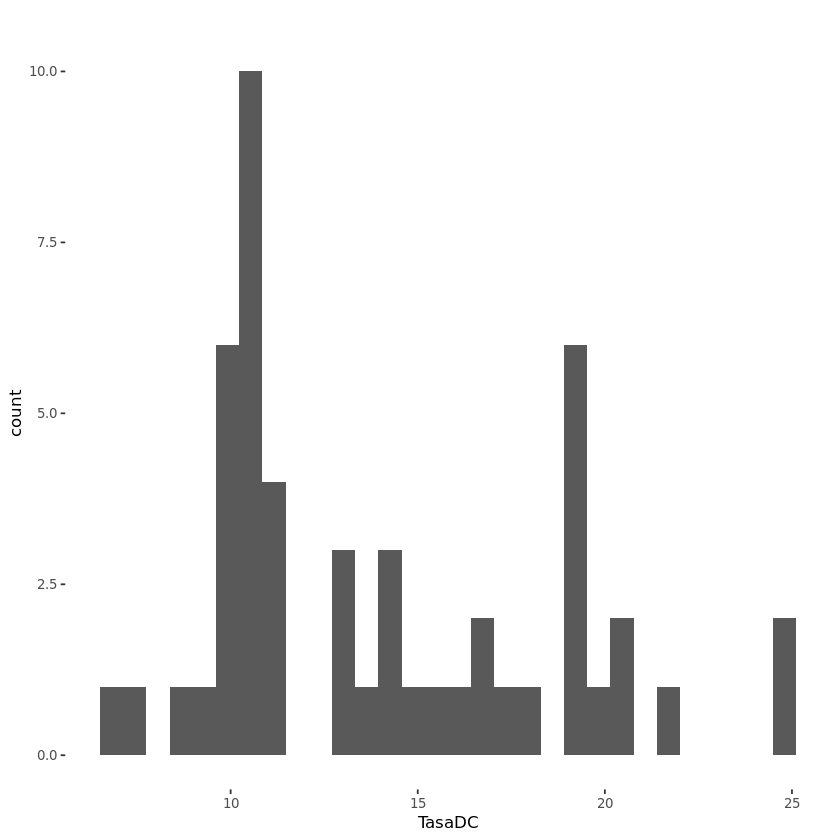

In [24]:
#Gráficos
ggplot(data = dataRed, mapping = aes(x = TasaDC)) +
  geom_histogram() +
  labs(title = "")+
  theme(panel.background = element_rect(fill = 'white'), 
        text=element_text(size=10,  family="Arial"),
        legend.position  = "bottom")

In [25]:
desMean <- mean(dataRed$'TasaDC')
print(desMean)
desVar <- var(dataRed$'TasaDC')
print(desVar)
desMed <- median(dataRed$'TasaDC')
print(desMed)
desMod <- mfv(dataRed$'TasaDC')
print(desMod)
desMin <- min(dataRed$'TasaDC')
print(desMin)
desMax <- max(dataRed$'TasaDC')
print(desMax)
desRango <- IQR(dataRed$'TasaDC')
print(desRango)
#duda Media Armonica
desArm <- 1/mean(1/dataRed$'TasaDC')
print(desArm)
#media geométrica
n <- length(dataRed$'TasaDC')
desMGeo <- prod(dataRed$'TasaDC')^(1/n)
print(desMGeo)
#media cuadrática
desMCua <- (sum(dataRed$'TasaDC' ** 2) / n) ** 0.5
print(desMCua)

desKur <- kurtosis(dataRed$'TasaDC')
print(desKur)

desQuant <- quantile(dataRed$'TasaDC', probs = seq(0, 1, 0.25), na.rm = FALSE,
         names = TRUE, type = 7)
print(desQuant)

#correlacion<-cor(dataCuant)
#corrplot(correlacion,method="circle", shade.col=NA, tl.col="black",
#        tl.srt=20, addCoef.col="black",type="lower")

[1] 14.0182
[1] 20.63262
[1] 12.955
[1] 10.5
[1] 6.91
[1] 24.89
[1] 7.5075
[1] 12.7183
[1] 13.34
[1] 14.72175
[1] -0.7220774
     0%     25%     50%     75%    100% 
 6.9100 10.5000 12.9550 18.0075 24.8900 


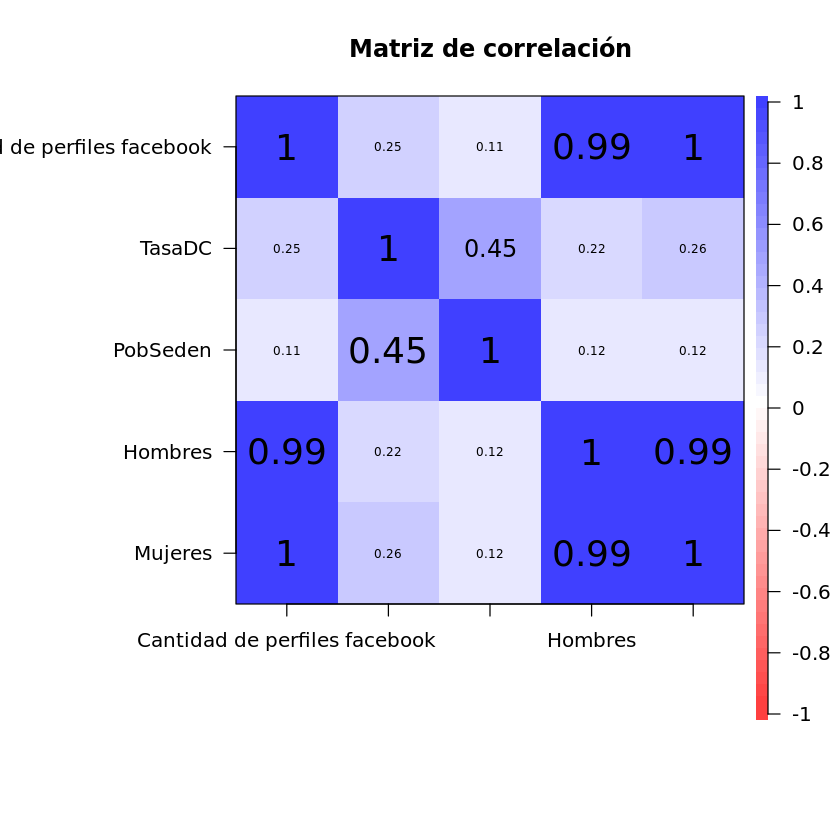

In [26]:
corPlot(dataRed[,c('Cantidad de perfiles facebook', 'TasaDC', 'PobSeden', 'Hombres', 'Mujeres')], 
        cex = 1.2, main = "Matriz de correlación")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


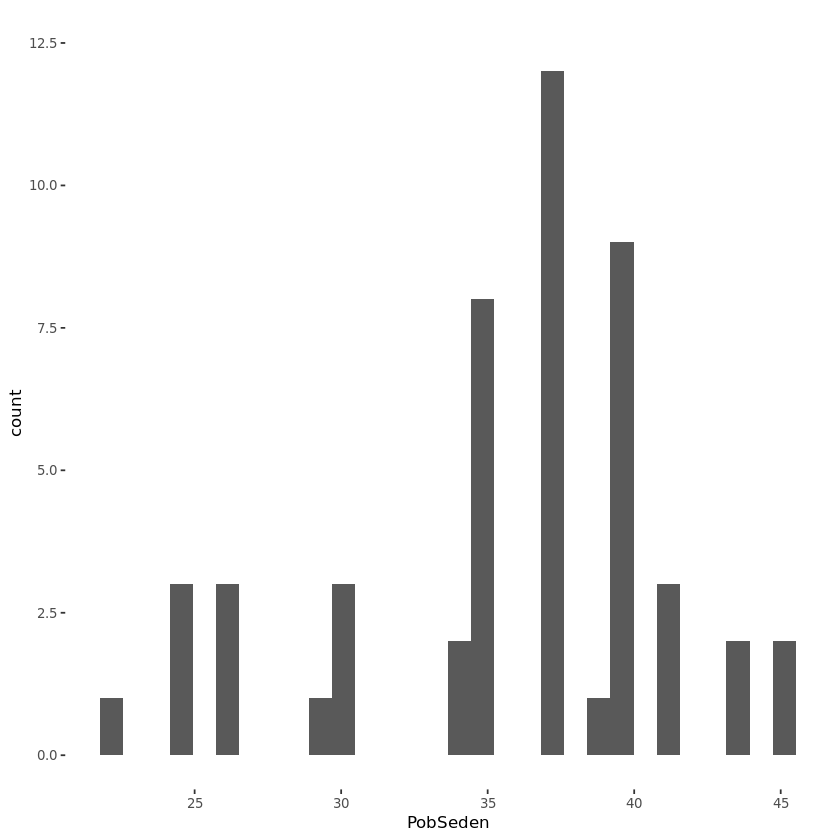

In [27]:
ggplot(data = dataRed, mapping = aes(x = PobSeden)) +
  geom_histogram() +
  labs(title = "")+
  theme(panel.background = element_rect(fill = 'white'), 
        text=element_text(size=10,  family="Arial"),
        legend.position  = "bottom")

In [28]:
pobMean <- mean(dataRed$'PobSeden')
print(pobMean)
pobVar <- var(dataRed$'PobSeden')
print(pobVar)
pobMed <- median(dataRed$'PobSeden')
print(pobMed)
pobMod <- mfv(dataRed$'PobSeden')
print(pobMod)
pobMin <- min(dataRed$'PobSeden')
print(pobMin)
pobMax <- max(dataRed$'PobSeden')
print(pobMax)
pobRango <- IQR(dataRed$'PobSeden')
print(pobRango)
#duda Media Armonica
pobArm <- 1/mean(1/dataRed$'PobSeden')
print(pobArm)
#media geométrica
n <- length(dataRed$'PobSeden')
pobMGeo <- prod(dataRed$'PobSeden')^(1/n)
print(pobMGeo)
#media cuadrática
pobMCua <- (sum(dataRed$'PobSeden' ** 2) / n) ** 0.5
print(pobMCua)

pobKur <- kurtosis(dataRed$'PobSeden')
print(pobKur)

pobQuant <- quantile(dataRed$'PobSeden', probs = seq(0, 1, 0.25), na.rm = FALSE,
         names = TRUE, type = 7)
print(pobQuant)

[1] 35.6366
[1] 31.28248
[1] 37.315
[1] 37.35
[1] 22.03
[1] 44.99
[1] 5.32
[1] 34.62885
[1] 35.15891
[1] 36.06417
[1] -0.2009859
     0%     25%     50%     75%    100% 
22.0300 34.0525 37.3150 39.3725 44.9900 


# Hipótesis: 
1. H0: Determinar si el % de desempleo de cada ciudades es similar a la tasa de desempleo de España (14.28%)

In [29]:
dist <- fdt(dataRed$'TasaDC',breaks="Sturges") # calcula la distribución de frecuencias utilizando la regla Sturge

dist #nos brinda una tabla con los calculos de la distribución de frecuencias.

Class limits,f,rf,rf(%),cf,cf(%)
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
"[6.8409,9.4549)",3,0.06,6,3,6
"[9.4549,12.069)",21,0.42,42,24,48
"[12.069,14.683)",7,0.14,14,31,62
"[14.683,17.297)",5,0.10,10,36,72
"[17.297,19.911)",9,0.18,18,45,90
"[19.911,22.525)",3,0.06,6,48,96
"[22.525,25.139)",2,0.04,4,50,100


# Chi cuadrada

**PENDIENTE REVISAR**

In [30]:
dist$table$f

[1]  3 21  7  5  9  3  2

In [32]:
FRECUENCIAS<-dist$table$f
PROBABILIDADES<-c(0.1428,0.1428, 0.1428, 0.1428, 0.1428, 0.1428, 0.1432)
chisq.test(FRECUENCIAS,p=PROBABILIDADES)


	Chi-squared test for given probabilities

data:  FRECUENCIAS
X-squared = 36.553, df = 6, p-value = 2.152e-06


In [33]:
#el 12.59 resultante es el punto exacto donde se cruzan 0.95 con los grados de libertad. Nuestra chi cuadrada 36.55, 
#que es mayor que 12.59. Esto confirma nuestro p-valor
qchisq(0.95, 6) 

[1] 12.59159

In [34]:
#rep(0.1626,7)

In [35]:
desMean <- mean(dataRed$'TasaDC')
desSD <- sd(dataRed$'TasaDC')
ks.test(dataRed$TasaDC,pnorm,desMean,desSD)

Warning message in ks.test(dataRed$TasaDC, pnorm, desMean, desSD):
“ties should not be present for the Kolmogorov-Smirnov test”


	One-sample Kolmogorov-Smirnov test

data:  dataRed$TasaDC
D = 0.19335, p-value = 0.04759
alternative hypothesis: two-sided


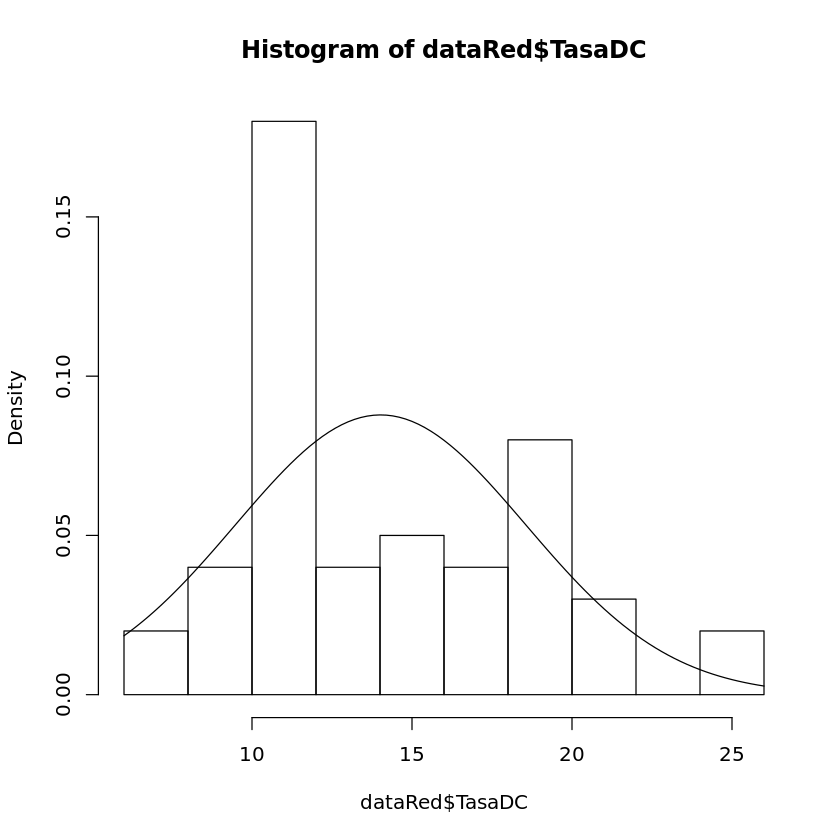

In [36]:
hist(dataRed$TasaDC, probability = T)
curve(dnorm(x,desMean,desSD),add = T)

## Conclusion: 

test de Kolmogorov-Smirnov

**CONTRASTE DE HIPÓTESIS**

H0: Los datos de TasaDC proceden de una distribución normal

H1: los datos de TasaDC no proceden de una distribución normal

  Luego de ejecutar el test, el resultado del p-value es de 0.04759.  
  El p-value es menor a 0.05, por lo tanto NO se puede aceptar la hipotesis H0

In [37]:
# Trabajando con la variable dataRed$'PobSeden'
pobMean <- mean(dataRed$'PobSeden')
pobSD <- sd(dataRed$'PobSeden')
ks.test(dataRed$PobSeden,pnorm,pobMean,pobSD)

Warning message in ks.test(dataRed$PobSeden, pnorm, pobMean, pobSD):
“ties should not be present for the Kolmogorov-Smirnov test”


	One-sample Kolmogorov-Smirnov test

data:  dataRed$PobSeden
D = 0.1976, p-value = 0.04029
alternative hypothesis: two-sided


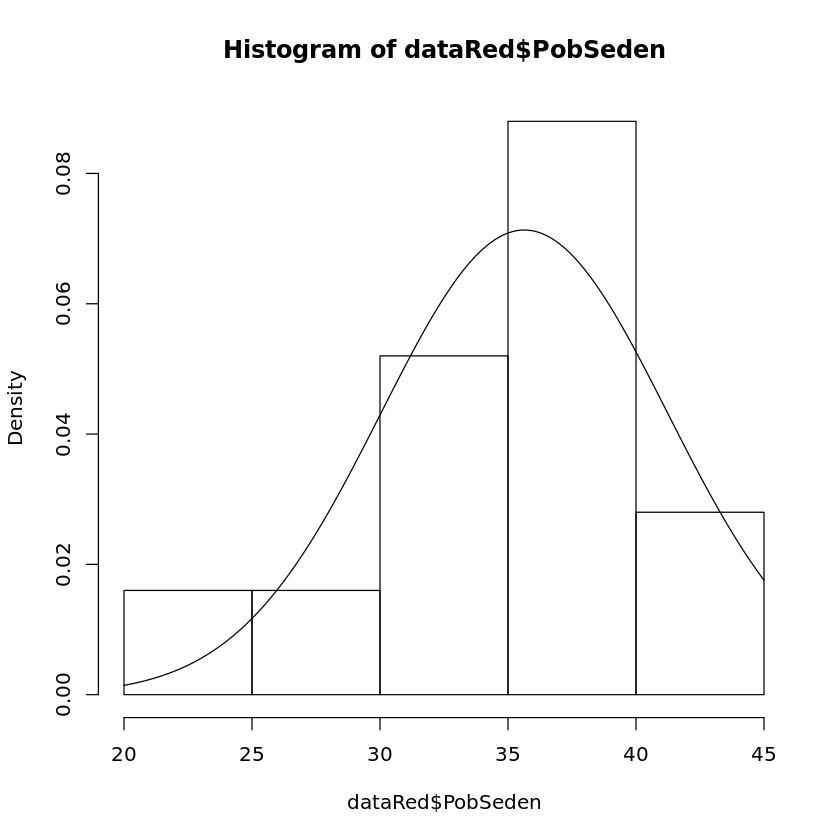

In [95]:
hist(dataRed$PobSeden, probability = T)
curve(dnorm(x,pobMean,pobSD),add = T)

## Conclusion: 
test de Kolmogorov-Smirnov

**CONTRASTE DE HIPÓTESIS**

 H0: Los datos de PobSeden proceden de una distribución normal
 
 H1: los datos de PobSeden no proceden de una distribución normal

  Luego de ejecutar el test, el resultado del p-value es de 0.04029.  
  El p-value es menor a 0.05, por lo tanto NO se puede aceptar la hipotesis H0

## Hipótesis t-student

* H0: La media de nivel de desempleo = 15% con un nivel de significación del 0.05
* H1: La media de nivel de desempleo > 15% con un nivel de significación del 0.05

In [40]:
t.test(dataRed$TasaDC, mu=15, alternative="greater",conf.level = 0.95)


	One Sample t-test

data:  dataRed$TasaDC
t = -1.5284, df = 49, p-value = 0.9336
alternative hypothesis: true mean is greater than 15
95 percent confidence interval:
 12.94122      Inf
sample estimates:
mean of x 
  14.0182 


In [41]:
var_test = Var.test(dataRed$TasaDC, y = NULL, ratio = 1, alternative = c("greater"), paired = FALSE, conf.level = 0.95)
var_test


	One-sample variance test

data:  x
X-squared = 1011, df = 49, p-value < 2.2e-16
alternative hypothesis: true variance is greater than 1
95 percent confidence interval:
 15.23996      Inf
sample estimates:
variance 
20.63262 


## Prop Test

* H0: Probabilidad de que X=28 ciudades tengan un nivel de desempleo inferior a la media

PENDIENTE DE DEFINIR X, de momento lo dejamos como 28

In [70]:
length(dataRed$Ciudad[dataRed$TasaDC < 14.0182])
prop.test(28,n=50,alternative="two.side",conf.level = 0.95)

[1] 28


	1-sample proportions test with continuity correction

data:  28 out of 50, null probability 0.5
X-squared = 0.5, df = 1, p-value = 0.4795
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.4134993 0.6973395
sample estimates:
   p 
0.56 


[1] 28